In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Meta data
This file contains all the meta information regarding the columns described in the CSV files. we have provided 3 CSV files:
1. dim_customers.csv
2. dim_products.csv
3. dim_date
4. dim_targets_orders
5. fact_order_lines.csv
6. fact_orders_aggregate.csv

---------------------------------------------------------------------------------------------

Column Description for dim_customers:

This table contains all the information about customers

1. customer_id: Unique ID is given to each customer
2. customer_name: Name of the customer
3. city: It is the city where the customer is present

---------------------------------------------------------------------------------------------------

Column Description for dim_products:
This table contains all the information about the products

1. product_name: It is the name of the product
2. product_id: Unique ID is given to each of the products
3. category: It is the class to which the product belongs

---------------------------------------------------------------------------------------------------

Column Description for dim_date:
This table contains the dates at daily, monthly level and week numbers of the year

1. date: date at the daily level
2. mmm_yy: date at the monthly level
3. week_no: week number of the year as per the date column

---------------------------------------------------------------------------------------------------

Column Description for dim_targets_orders:
This table contains all target data at the customer level

1. customer_id: Unique ID that is given to each of the customers
2. ontime_target %: Target assigned for Ontime % for a given customer
3. infull_target %: Target assigned for infull % for a given customer
4. otif_target %:   Target assigned for otif % for a given customer

---------------------------------------------------------------------------------------------------

Column Description for fact_order_lines:
This table contains all information about orders and each item inside the orders.

1. order_id: Unique ID for each order the customer placed
2. order_placement_date: It is the date when the customer placed the order
3. customer_id: Unique ID that is given to each of the customers
4. product_id: Unique ID that is given to each of the products
5. order_qty: It is the number of products requested by the customer to be delivered
6. agreed_delivery_date: It is the date agreed between the customer and Atliq Mart to deliver the products
7. actual_delivery_date: It is the actual date Atliq Mart delivered the product to the customer
8. delivered_qty: It is the number of products that are actually delivered to the customer


---------------------------------------------------------------------------------------------------

Column Description for fact_orders_aggregate:
This table contains information about OnTime, InFull and OnTime Infull information aggregated at the order level per customer

1. order_id: Unique ID for each order the customer placed
2. customer_id: Unique ID that is given to each of the customers
3. order_placement_date: It is the date when the customer placed the order
4. on_time: '1' denotes the order is delviered on time. '0' denotes the order is not delivered on time.
5. in_full: '1' denotes the order is delviered in full quantity. '0' denotes the order is not delivered in full quantity.
6. otif:    '1' denotes the order is delviered both on time and in full quantity. '0' denotes the order is either not delivered on time or not in full quantity.


### dim_customers table

In [2]:
dim_cust = pd.read_csv('dim_customers.csv')
dim_cust.head()

,customer_id,customer_name,city
0,789201,Rel Fresh,Surat
1,789202,Rel Fresh,Ahmedabad
2,789203,Rel Fresh,Vadodara
3,789301,Expression Stores,Surat
4,789303,Expression Stores,Vadodara


In [3]:
print(f"dim_customers has {dim_cust.shape[0]} rows and {dim_cust.shape[1]} columns")

dim_customers has 35 rows and 3 columns


In [4]:
# print info
dim_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    35 non-null     int64 
 1   customer_name  35 non-null     object
 2   city           35 non-null     object
dtypes: int64(1), object(2)
memory usage: 968.0+ bytes


In [5]:
# check for unique values in the primary key customer_id
dim_cust['customer_id'].nunique()

35

So, there are 35 unqiue values in the primary key, as expected.

In [6]:
# check for unique names in customer_name and city to check for any inconsistencies in the data
print(f"There are {dim_cust['customer_name'].nunique()} unique values in customer name")
print(f"There are {dim_cust['city'].nunique()} unique values in city")

There are 15 unique values in customer name
There are 3 unique values in city


In [7]:
dim_cust['customer_name'].unique()

array(['Rel Fresh', 'Expression Stores', 'Vijay Stores', 'Coolblue',
       'Atlas Stores', 'Chiptec Stores', 'Propel Mart', 'Lotus Mart',
       'Viveks Stores', 'Acclaimed Stores', 'Info Stores', 'Sorefoz Mart',
       'Expert Mart', 'Logic Stores', 'Elite Mart'], dtype=object)

In [8]:
dim_cust['city'].unique()

array(['Surat', 'Ahmedabad', 'Vadodara'], dtype=object)

### dim_date table

In [9]:
dim_dt = pd.read_csv('dim_date.csv')
dim_dt.head()

,date,mmm_yy,week_no
0,01-Apr-22,01-Apr-22,W 14
1,03-Apr-22,01-Apr-22,W 15
2,04-Apr-22,01-Apr-22,W 15
3,05-Apr-22,01-Apr-22,W 15
4,06-Apr-22,01-Apr-22,W 15


In [10]:
print(f"dim_date has {dim_dt.shape[0]} rows and {dim_dt.shape[1]} columns")

dim_date has 183 rows and 3 columns


In [11]:
dim_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     183 non-null    object
 1   mmm_yy   183 non-null    object
 2   week_no  183 non-null    object
dtypes: object(3)
memory usage: 4.4+ KB


date is a string data type..convert it to datetime to make it more useful

In [12]:
dim_dt['date'] = pd.to_datetime(dim_dt['date'])

In [13]:
dim_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     183 non-null    datetime64[ns]
 1   mmm_yy   183 non-null    object        
 2   week_no  183 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 4.4+ KB


In [14]:
# check for unique values in the primary key date
dim_dt['date'].nunique()

183

In [15]:
# check for unique names in mmm_yy and week_no to check for any inconsistencies in the data
print(f"There are {dim_dt['mmm_yy'].nunique()} unique values in mmm_yy")
print(f"There are {dim_dt['week_no'].nunique()} unique values in week_no")

There are 6 unique values in mmm_yy
There are 27 unique values in week_no


In [16]:
dim_dt['mmm_yy'].unique()

array(['01-Apr-22', '01-Aug-22', '01-Jul-22', '01-Jun-22', '01-Mar-22',
       '01-May-22'], dtype=object)

In [17]:
# check the max and min dates
dim_dt['date'].agg(['min', 'max'])

min   2022-03-01
max   2022-08-30
Name: date, dtype: datetime64[ns]

### dim_products

In [18]:
dim_prod = pd.read_csv('dim_products.csv')
dim_prod.head()

,product_name,product_id,category
0,AM Milk 500,25891101,Dairy
1,AM Milk 250,25891102,Dairy
2,AM Milk 100,25891103,Dairy
3,AM Butter 100,25891201,Dairy
4,AM Butter 250,25891202,Dairy


In [19]:
print(f"dim_prod has {dim_prod.shape[0]} rows and {dim_prod.shape[1]} columns")

dim_prod has 18 rows and 3 columns


In [20]:
# Check info
dim_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  18 non-null     object
 1   product_id    18 non-null     int64 
 2   category      18 non-null     object
dtypes: int64(1), object(2)
memory usage: 560.0+ bytes


In [21]:
# check for unique values in the primary key product_id
dim_prod['product_id'].nunique()

18

In [22]:
# check for unique names in product_name and category to check for any inconsistencies in the data
print(f"There are {dim_prod['product_name'].nunique()} unique values in product name")
print(f"There are {dim_prod['category'].nunique()} unique values in category")

There are 18 unique values in product name
There are 3 unique values in category


In [23]:
dim_prod['product_name'].unique()

array(['AM Milk 500', 'AM Milk 250', 'AM Milk 100', 'AM Butter 100',
       'AM Butter 250', 'AM Butter 500', 'AM Ghee 250', 'AM Ghee 150',
       'AM Ghee 100', 'AM Curd 250', 'AM Curd 100', 'AM Curd 50',
       'AM Biscuits 750', 'AM Biscuits 500', 'AM Biscuits 250',
       'AM Tea 500', 'AM Tea 250', 'AM Tea 100'], dtype=object)

In [24]:
dim_prod['category'].unique()

array(['Dairy', 'Food', 'beverages'], dtype=object)

### dim_targets_orders

In [25]:
dim_tgt_or = pd.read_csv('dim_targets_orders.csv')
dim_tgt_or.head()

,customer_id,ontime_target%,infull_target%,otif_target%
0,789201,87,81,70
1,789202,85,81,69
2,789203,92,76,70
3,789301,89,78,69
4,789303,88,78,69


In [26]:
print(f"dim_prod has {dim_tgt_or.shape[0]} rows and {dim_tgt_or.shape[1]} columns")

dim_prod has 35 rows and 4 columns


In [27]:
# check for unique values in the primary key customer_id
dim_tgt_or['customer_id'].nunique()

35

In [28]:
# Check info
dim_tgt_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     35 non-null     int64
 1   ontime_target%  35 non-null     int64
 2   infull_target%  35 non-null     int64
 3   otif_target%    35 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB


### fact_order_lines

In [29]:
fact_or_lin = pd.read_csv('fact_order_lines.csv')
fact_or_lin.head()

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
0,FMR34203601,"Tuesday, March 1, 2022",789203,25891601,110,"Friday, March 4, 2022","Friday, March 4, 2022",110,1,1,1
1,FMR32320302,"Tuesday, March 1, 2022",789320,25891203,347,"Wednesday, March 2, 2022","Wednesday, March 2, 2022",347,1,1,1
2,FMR33320501,"Tuesday, March 1, 2022",789320,25891203,187,"Thursday, March 3, 2022","Thursday, March 3, 2022",150,0,1,0
3,FMR34220601,"Tuesday, March 1, 2022",789220,25891203,235,"Friday, March 4, 2022","Friday, March 4, 2022",235,1,1,1
4,FMR33703603,"Tuesday, March 1, 2022",789703,25891203,176,"Thursday, March 3, 2022","Thursday, March 3, 2022",176,1,1,1


In [30]:
print(f"fact_or_lin has {fact_or_lin.shape[0]} rows and {fact_or_lin.shape[1]} columns")

fact_or_lin has 57096 rows and 11 columns


In [31]:
# Check info
fact_or_lin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57096 entries, 0 to 57095
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   order_id              57096 non-null  object
 1   order_placement_date  57096 non-null  object
 2   customer_id           57096 non-null  int64 
 3   product_id            57096 non-null  int64 
 4   order_qty             57096 non-null  int64 
 5   agreed_delivery_date  57096 non-null  object
 6   actual_delivery_date  57096 non-null  object
 7   delivery_qty          57096 non-null  int64 
 8   In Full               57096 non-null  int64 
 9   On Time               57096 non-null  int64 
 10  On Time In Full       57096 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 4.8+ MB


In [32]:
# Convert agreed_delivery_date, actual_delivery_date and order_placement_date to datetime
fact_or_lin['agreed_delivery_date'] = pd.to_datetime(fact_or_lin['agreed_delivery_date'])
fact_or_lin['order_placement_date'] = pd.to_datetime(fact_or_lin['order_placement_date'])
fact_or_lin['actual_delivery_date'] = pd.to_datetime(fact_or_lin['actual_delivery_date'])

In [33]:
fact_or_lin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57096 entries, 0 to 57095
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              57096 non-null  object        
 1   order_placement_date  57096 non-null  datetime64[ns]
 2   customer_id           57096 non-null  int64         
 3   product_id            57096 non-null  int64         
 4   order_qty             57096 non-null  int64         
 5   agreed_delivery_date  57096 non-null  datetime64[ns]
 6   actual_delivery_date  57096 non-null  datetime64[ns]
 7   delivery_qty          57096 non-null  int64         
 8   In Full               57096 non-null  int64         
 9   On Time               57096 non-null  int64         
 10  On Time In Full       57096 non-null  int64         
dtypes: datetime64[ns](3), int64(7), object(1)
memory usage: 4.8+ MB


In [34]:
# Check unique in order_id
fact_or_lin['order_id'].nunique()

31729

Seems like there are some duplicate order ids in the data

In [35]:
# filter duplicate order_id values
duplicate_orders = fact_or_lin[fact_or_lin.duplicated(subset = "order_id", keep = False)]
duplicate_orders

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
0,FMR34203601,2022-03-01,789203,25891601,110,2022-03-04,2022-03-04,110,1,1,1
1,FMR32320302,2022-03-01,789320,25891203,347,2022-03-02,2022-03-02,347,1,1,1
2,FMR33320501,2022-03-01,789320,25891203,187,2022-03-03,2022-03-03,150,0,1,0
3,FMR34220601,2022-03-01,789220,25891203,235,2022-03-04,2022-03-04,235,1,1,1
4,FMR33703603,2022-03-01,789703,25891203,176,2022-03-03,2022-03-03,176,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
57084,FAUG831121302,2022-08-30,789121,25891202,168,2022-08-31,2022-08-31,168,1,1,1
57085,FAUG831203403,2022-08-30,789203,25891303,43,2022-08-31,2022-08-31,43,1,1,1
57087,FAUG831721603,2022-08-30,789721,25891303,40,2022-08-31,2022-08-31,40,1,1,1
57090,FAUG831720502,2022-08-30,789720,25891303,43,2022-08-31,2022-08-31,39,0,1,0


In [36]:
duplicate_record = fact_or_lin[fact_or_lin['order_id'] == "FMR34203601"]
duplicate_record

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
0,FMR34203601,2022-03-01,789203,25891601,110,2022-03-04,2022-03-04,110,1,1,1
47,FMR34203601,2022-03-01,789203,25891301,100,2022-03-04,2022-03-04,100,1,1,1


In [37]:
duplicate_record = fact_or_lin[fact_or_lin['order_id'] == "FMR32320302"]
duplicate_record

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
1,FMR32320302,2022-03-01,789320,25891203,347,2022-03-02,2022-03-02,347,1,1,1
21,FMR32320302,2022-03-01,789320,25891302,54,2022-03-02,2022-03-02,54,1,1,1


So, duplicate order ids show that in a certain order more than one product has been ordered as can be seen by different product ids

In [38]:
cust_id = fact_or_lin[fact_or_lin['customer_id'] == 789103]
cust_id[cust_id['order_id'] == "FAUG831103502"]

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
56991,FAUG831103502,2022-08-30,789103,25891203,427,2022-08-31,2022-08-31,427,1,1,1
56994,FAUG831103502,2022-08-30,789103,25891302,74,2022-08-31,2022-08-31,70,0,1,0
57012,FAUG831103502,2022-08-30,789103,25891502,160,2022-08-31,2022-08-31,160,1,1,1


### fact_orders_aggregate

In [39]:
fact_or_agg = pd.read_csv('fact_orders_aggregate.csv')
fact_or_agg.head()

,order_id,customer_id,order_placement_date,on_time,in_full,otif
0,FMR32103503,789103,01-Mar-22,1,0,0
1,FMR34103403,789103,01-Mar-22,1,0,0
2,FMR32103602,789103,01-Mar-22,1,0,0
3,FMR33103602,789103,01-Mar-22,1,0,0
4,FMR33103401,789103,01-Mar-22,1,0,0


In [40]:
print(f"fact_or_agg table\nRows: {fact_or_agg.shape[0]}\nColumns: {fact_or_agg.shape[1]}")

fact_or_agg table
Rows: 31729
Columns: 6


In [41]:
# print info
fact_or_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31729 entries, 0 to 31728
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   order_id              31729 non-null  object
 1   customer_id           31729 non-null  int64 
 2   order_placement_date  31729 non-null  object
 3   on_time               31729 non-null  int64 
 4   in_full               31729 non-null  int64 
 5   otif                  31729 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB


In [42]:
fact_or_agg['order_placement_date'] = pd.to_datetime(fact_or_agg['order_placement_date'])

In [43]:
# Check number of unique values in order_id
fact_or_agg['order_id'].nunique()

31729

In [44]:
# Check number of unique values in customer_id
fact_or_agg['customer_id'].nunique()

35

In [45]:
fact_or_agg[fact_or_agg['customer_id'] == 789103]

,order_id,customer_id,order_placement_date,on_time,in_full,otif
0,FMR32103503,789103,2022-03-01,1,0,0
1,FMR34103403,789103,2022-03-01,1,0,0
2,FMR32103602,789103,2022-03-01,1,0,0
3,FMR33103602,789103,2022-03-01,1,0,0
4,FMR33103401,789103,2022-03-01,1,0,0
...,...,...,...,...,...,...
31589,FAUG831103603,789103,2022-08-29,0,0,0
31620,FAUG831103202,789103,2022-08-29,0,1,0
31656,FAUG831103401,789103,2022-08-29,1,1,1
31666,FAUG831103502,789103,2022-08-30,1,0,0


In [46]:
def plot_metrics(metric1, metric2,metric,target):
    data = {metric : metric1, target : metric2}
    df_to_plot = pd.DataFrame(list(data.items()), columns = ['Metric', 'Value'])
    
    # Plotting
    sns.set()
    plt.figure(figsize = (6,4))
    plt.bar(df_to_plot['Metric'], df_to_plot['Value'], color = ['blue', 'orange'])
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.title(f'Comparison of {metric} with {target}')
    plt.ylim(0, max(df_to_plot['Value']) + 10)
    # Adding text label on bars
    for i, value in enumerate(df_to_plot['Value']):
        plt.text(i, value + 1, f'{value}', ha = 'center')
    plt.show()

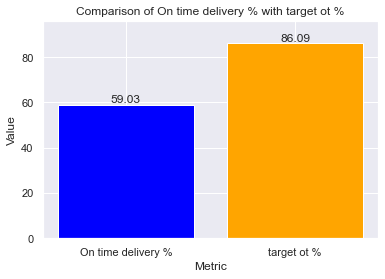

In [47]:
# On time %
ot = round(100*((fact_or_agg['on_time'].sum())/fact_or_agg.shape[0]),2)
ot_target = round(dim_tgt_or['ontime_target%'].sum()/dim_tgt_or.shape[0],2)
plot_metrics(ot, ot_target, 'On time delivery %','target ot %')

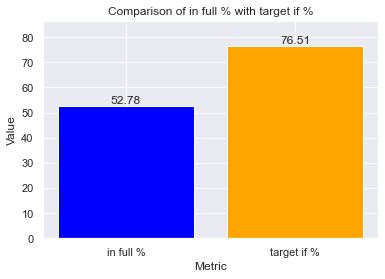

In [48]:
# In full %
IF = round(100*((fact_or_agg['in_full'].sum())/fact_or_agg.shape[0]),2)
IF_target = round(dim_tgt_or['infull_target%'].sum()/dim_tgt_or.shape[0],2)
plot_metrics(IF, IF_target, 'in full %', 'target if %')

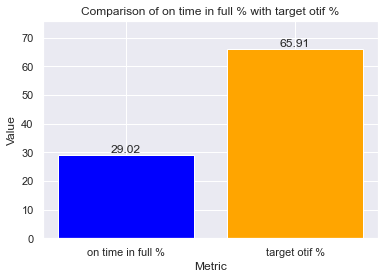

In [49]:
# On time In full %
otif = round(100*((fact_or_agg['otif'].sum())/fact_or_agg.shape[0]),2)
otif_target = round(dim_tgt_or['otif_target%'].sum()/dim_tgt_or.shape[0],2)
plot_metrics(otif, otif_target, 'on time in full %', 'target otif %')

In [50]:
total_order_lines = fact_or_lin.shape[0]
LIFR = round(100*(fact_or_lin['In Full'].sum()/total_order_lines),1)
LIFR

66.0

In [51]:
total_qty_ordered = fact_or_lin['order_qty'].sum()
total_qty_delivered = fact_or_lin['delivery_qty'].sum()
VOFR = round(100*(total_qty_delivered/total_qty_ordered),1)
VOFR

96.6

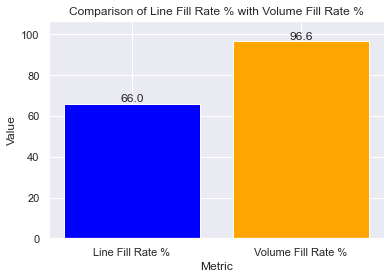

In [52]:
# Calculate Line Fill Rate -> LIFR
total_order_lines = fact_or_lin.shape[0]
LIFR = round(100*(fact_or_lin['In Full'].sum()/total_order_lines),1)
# Calculate Volume Fill Rate -> VOFR
total_qty_ordered = fact_or_lin['order_qty'].sum()
total_qty_delivered = fact_or_lin['delivery_qty'].sum()
VOFR = round(100*(total_qty_delivered/total_qty_ordered),1)
plot_metrics(LIFR, VOFR, 'Line Fill Rate %', 'Volume Fill Rate %')

In [53]:
cust_fact_or_agg = pd.merge(dim_cust, fact_or_agg, how='left', on='customer_id')
cust_fact_or_agg.head()

,customer_id,customer_name,city,order_id,order_placement_date,on_time,in_full,otif
0,789201,Rel Fresh,Surat,FMR34201202,2022-03-01,1,0,0
1,789201,Rel Fresh,Surat,FMR33201602,2022-03-01,1,0,0
2,789201,Rel Fresh,Surat,FMR34201201,2022-03-01,0,0,0
3,789201,Rel Fresh,Surat,FMR32201502,2022-03-01,1,1,1
4,789201,Rel Fresh,Surat,FMR35201303,2022-03-02,1,0,0


In [54]:
# join dim_cust with dim_target_orders
cust_target = pd.merge(dim_cust, dim_tgt_or, how = 'left', on = 'customer_id')
cust_target.head()

,customer_id,customer_name,city,ontime_target%,infull_target%,otif_target%
0,789201,Rel Fresh,Surat,87,81,70
1,789202,Rel Fresh,Ahmedabad,85,81,69
2,789203,Rel Fresh,Vadodara,92,76,70
3,789301,Expression Stores,Surat,89,78,69
4,789303,Expression Stores,Vadodara,88,78,69


In [55]:
def create_df_targets(*args):
    metr_col = cust_fact_or_agg.groupby(args[0])[args[1]].sum()
    metr_col_count = cust_fact_or_agg.groupby(args[0])[args[1]].count()
    metr = round(100*(metr_col/metr_col_count), 2)
    # Targets
    metr_col_tgt = cust_target.groupby(args[0])[args[2]].sum()
    metr_col_count = cust_target.groupby(args[0])[args[2]].count()
    metr_target = round((metr_col_tgt/metr_col_count), 2)
    # Create dataframe
    df_metr = pd.merge(metr, metr_target, right_index = True, left_index = True)
    df_metr.reset_index(inplace = True)
    return df_metr

In [56]:
# create city split dataframes
df_OT = create_df_targets('city', 'on_time', 'ontime_target%')
df_IF = create_df_targets('city', 'in_full', 'infull_target%')
df_OTIF = create_df_targets('city', 'otif', 'otif_target%')
df_OTIF

,city,otif,otif_target%
0,Ahmedabad,29.33,66.50
1,Surat,30.07,66.36
2,Vadodara,27.78,64.92


### Split by Cities

In [57]:
OT_IF = pd.merge(df_OT, df_IF, how = "inner", on = "city")
split_cities = pd.merge(OT_IF, df_OTIF, how = "inner", on = "city")
split_cities

,city,on_time,ontime_target%,in_full,infull_target%,otif,otif_target%
0,Ahmedabad,58.16,85.83,54.20,77.33,29.33,66.50
1,Surat,61.21,86.27,52.55,76.91,30.07,66.36
2,Vadodara,57.98,86.17,51.56,75.33,27.78,64.92


### Split by Customers

In [58]:
def create_df(*args):
    metr_col = cust_fact_or_agg.groupby(args[0])[args[1]].sum()
    metr_col_count = cust_fact_or_agg.groupby(args[0])[args[1]].count()
    metr = round(100*(metr_col/metr_col_count), 2)
    # Targets
    metr_col_tgt = cust_target.groupby(args[0])[args[2]].sum()
    metr_col_count = cust_target.groupby(args[0])[args[2]].count()
    metr_target = round((metr_col_tgt/metr_col_count), 2)
    # Create dataframe
    df_metr = pd.merge(metr, metr_target, right_index = True, left_index = True)
    df_metr.reset_index(inplace = True)
    return df_metr

In [60]:
def create_df(*args):
    customer = [customer for customer in dim_cust['customer_name'].unique()]
    cust_split = pd.DataFrame(customer, columns = ['customer_name'])
    for i in range(len(args) - 1):
        metr_col = cust_fact_or_agg.groupby(args[0])[args[i+1]].sum()
        metr_col_count = cust_fact_or_agg.groupby(args[0])[args[i+1]].count()
        metr = round(100*(metr_col/metr_col_count), 2)
        # Create dataframe
        cust_split = pd.merge(cust_split, metr, how = 'inner', on = 'customer_name')
        #customer_split.reset_index(inplace = True)
    return cust_split

In [61]:
# create customer split dataframes
customer_split = create_df('customer_name', 'on_time', 'in_full', 'otif')
customer_split

,customer_name,on_time,in_full,otif
0,Rel Fresh,72.32,58.69,38.18
1,Expression Stores,69.92,60.83,38.39
2,Vijay Stores,72.45,44.98,28.28
3,Coolblue,29.13,44.73,13.75
4,Atlas Stores,71.81,59.78,39.55
5,Chiptec Stores,71.62,60.35,38.73
6,Propel Mart,73.64,59.74,40.92
7,Lotus Mart,28.11,53.35,16.34
8,Viveks Stores,70.61,60.07,39.44
9,Acclaimed Stores,29.43,52.36,15.47


In [62]:
# join fact_or_lin with dim_cust
cust_fact_or_lin = pd.merge(dim_cust, fact_or_lin, how = 'left', on = 'customer_id')
cust_fact_or_lin

,customer_id,customer_name,city,order_id,order_placement_date,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
0,789201,Rel Fresh,Surat,FMR34201202,2022-03-01,25891102,372,2022-03-04,2022-03-04,353,0,1,0
1,789201,Rel Fresh,Surat,FMR32201502,2022-03-01,25891502,160,2022-03-02,2022-03-02,160,1,1,1
2,789201,Rel Fresh,Surat,FMR33201602,2022-03-01,25891601,180,2022-03-03,2022-03-03,171,0,1,0
3,789201,Rel Fresh,Surat,FMR34201201,2022-03-01,25891201,291,2022-03-04,2022-03-05,233,0,0,0
4,789201,Rel Fresh,Surat,FMR33201602,2022-03-01,25891602,52,2022-03-03,2022-03-03,52,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57091,789903,Elite Mart,Vadodara,FAUG830903603,2022-08-29,25891202,461,2022-08-30,2022-08-30,461,1,1,1
57092,789903,Elite Mart,Vadodara,FAUG831903303,2022-08-29,25891303,29,2022-08-31,2022-09-03,28,0,0,0
57093,789903,Elite Mart,Vadodara,FAUG831903302,2022-08-30,25891302,63,2022-08-31,2022-08-31,60,0,1,0
57094,789903,Elite Mart,Vadodara,FAUG831903302,2022-08-30,25891101,389,2022-08-31,2022-08-31,370,0,1,0


Calculate LIFR and VOFR and merge with customer_split dataframe

In [63]:
# Calculate Line Fill Rate -> LIFR
total_order_lines = cust_fact_or_lin.groupby('customer_name')['In Full'].count()
LIFR_col = cust_fact_or_lin.groupby('customer_name')['In Full'].sum()
LIFR = round(100*(LIFR_col/total_order_lines),2)
# Calculate Volume Fill Rate -> VOFR
total_qty_ordered = cust_fact_or_lin.groupby('customer_name')['order_qty'].sum()
total_qty_delivered = cust_fact_or_lin.groupby('customer_name')['delivery_qty'].sum()
VOFR = round(100*(total_qty_delivered/total_qty_ordered),2)
LIFR_VOFR = pd.merge(LIFR.rename('LIFR'), VOFR.rename('VOFR'), right_index = True, left_index = True)
LIFR_VOFR.reset_index(inplace = True)
customer_split = pd.merge(customer_split, LIFR_VOFR, how = "inner", on = "customer_name")
#customer_split

In [64]:
LIFR_VOFR

,customer_name,LIFR,VOFR
0,Acclaimed Stores,58.93,95.85
1,Atlas Stores,75.48,97.58
2,Chiptec Stores,75.61,97.58
3,Coolblue,51.53,95.08
4,Elite Mart,52.74,95.29
5,Expert Mart,75.48,97.44
6,Expression Stores,75.28,97.54
7,Info Stores,53.05,95.24
8,Logic Stores,74.39,97.45
9,Lotus Mart,60.08,96.01


In [65]:
customer_split

,customer_name,on_time,in_full,otif,LIFR,VOFR
0,Rel Fresh,72.32,58.69,38.18,74.54,97.43
1,Expression Stores,69.92,60.83,38.39,75.28,97.54
2,Vijay Stores,72.45,44.98,28.28,59.23,95.87
3,Coolblue,29.13,44.73,13.75,51.53,95.08
4,Atlas Stores,71.81,59.78,39.55,75.48,97.58
5,Chiptec Stores,71.62,60.35,38.73,75.61,97.58
6,Propel Mart,73.64,59.74,40.92,75.62,97.70
7,Lotus Mart,28.11,53.35,16.34,60.08,96.01
8,Viveks Stores,70.61,60.07,39.44,75.06,97.57
9,Acclaimed Stores,29.43,52.36,15.47,58.93,95.85


### Metric Performance Overtime

In [66]:
def plot_metrics(metric1, metric2,metric,target):
    data = {metric : metric1, target : metric2}
    df_to_plot = pd.DataFrame(list(data.items()), columns = ['Metric', 'Value'])
    
    # Plotting
    sns.set()
    plt.figure(figsize = (6,4))
    plt.bar(df_to_plot['Metric'], df_to_plot['Value'], color = ['blue', 'orange'])
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.title(f'Comparison of {metric} with {target}')
    plt.ylim(0, max(df_to_plot['Value']) + 10)
    # Adding text label on bars
    for i, value in enumerate(df_to_plot['Value']):
        plt.text(i, value + 1, f'{value}', ha = 'center')
    plt.show()

In [67]:
# join fact_or_agg with dim_tgt_orders on customer_id
fact_tgt_or = pd.merge(fact_or_agg, dim_tgt_or, how = "inner", on = "customer_id")
fact_tgt_or.head()

,order_id,customer_id,order_placement_date,on_time,in_full,otif,ontime_target%,infull_target%,otif_target%
0,FMR32103503,789103,2022-03-01,1,0,0,92,67,62
1,FMR34103403,789103,2022-03-01,1,0,0,92,67,62
2,FMR32103602,789103,2022-03-01,1,0,0,92,67,62
3,FMR33103602,789103,2022-03-01,1,0,0,92,67,62
4,FMR33103401,789103,2022-03-01,1,0,0,92,67,62


In [68]:
fact_tgt_or.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31729 entries, 0 to 31728
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              31729 non-null  object        
 1   customer_id           31729 non-null  int64         
 2   order_placement_date  31729 non-null  datetime64[ns]
 3   on_time               31729 non-null  int64         
 4   in_full               31729 non-null  int64         
 5   otif                  31729 non-null  int64         
 6   ontime_target%        31729 non-null  int64         
 7   infull_target%        31729 non-null  int64         
 8   otif_target%          31729 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 2.4+ MB


In [69]:
# Convert OrderDate to datetime and set it as index
def plot_metrics_lines():
    fig, ax = plt.subplots(5, figsize = (15, 20))
    
    # Set copies of dataframe
    df1 = fact_tgt_or.copy()
    df2 = fact_or_lin.copy()
    
    # Convert order placement date to index
    df1.set_index('order_placement_date', inplace=True)
    df2.set_index('order_placement_date', inplace=True)

    # Resample data by month
    monthly_data_1 = df1.resample('M').mean()
    monthly_data_2 = df2.resample('M').mean()
    
    # Plotting
    ax[0].plot(monthly_data_1.index, round(100*(monthly_data_1['on_time']),2), label='On Time%', marker='o')
    ax[0].plot(monthly_data_1.index, monthly_data_1['ontime_target%'], label='OnTime_Target%', marker='x')
    ax[0].set_title('OT')
    ax[0].legend()
    ax[0].set_xlabel('Month')
    ax[0].set_ylabel('Metric')
    
    ax[1].plot(monthly_data_1.index, round(100*(monthly_data_1['in_full']),2), label='In Full%', marker='o')
    ax[1].plot(monthly_data_1.index, monthly_data_1['infull_target%'], label='InFull_Target%', marker='x')
    ax[1].set_title('IF')
    ax[1].legend()
    ax[1].set_xlabel('Month')
    ax[1].set_ylabel('Metric')
    
    ax[2].plot(monthly_data_1.index, round(100*(monthly_data_1['otif']),2), label='OnTime_InFull%', marker='o')
    ax[2].plot(monthly_data_1.index, monthly_data_1['otif_target%'], label='OTIF_Target%', marker='x')
    ax[2].set_title('OTIF')
    ax[2].legend()
    ax[2].set_xlabel('Month')
    ax[2].set_ylabel('Metric')
    
    ax[3].plot(monthly_data_2.index, round(100*(monthly_data_2['In Full']),2), label='LIFR', marker='o')
    #ax[0].plot(monthly_data_2.index, monthly_data_2['ontime_target%'], label='Target', marker='x')
    ax[3].set_title('Line Fill Rate %')
    ax[3].set_xlabel('Month')
    ax[3].set_ylabel('Metric')
    
    ax[4].plot(monthly_data_2.index, round(100*(monthly_data_2['delivery_qty']/monthly_data_2['order_qty']),2), label='VOFR', marker='o')
    #ax[0].plot(monthly_data_2.index, monthly_data_2['ontime_target%'], label='Target', marker='x')
    ax[4].set_title('VOFR')
    ax[4].set_xlabel('Month')
    ax[4].set_ylabel('Metric')

    # Formatting the plot
    #plt.title('Monthly Metric vs Target')
    #plt.xlabel('Month')
    #plt.ylabel('Metric')
    #plt.legend()
    #plt.grid(True)
    #plt.xticks(rotation=45)
    plt.tight_layout()

    # Show plot
    plt.show()

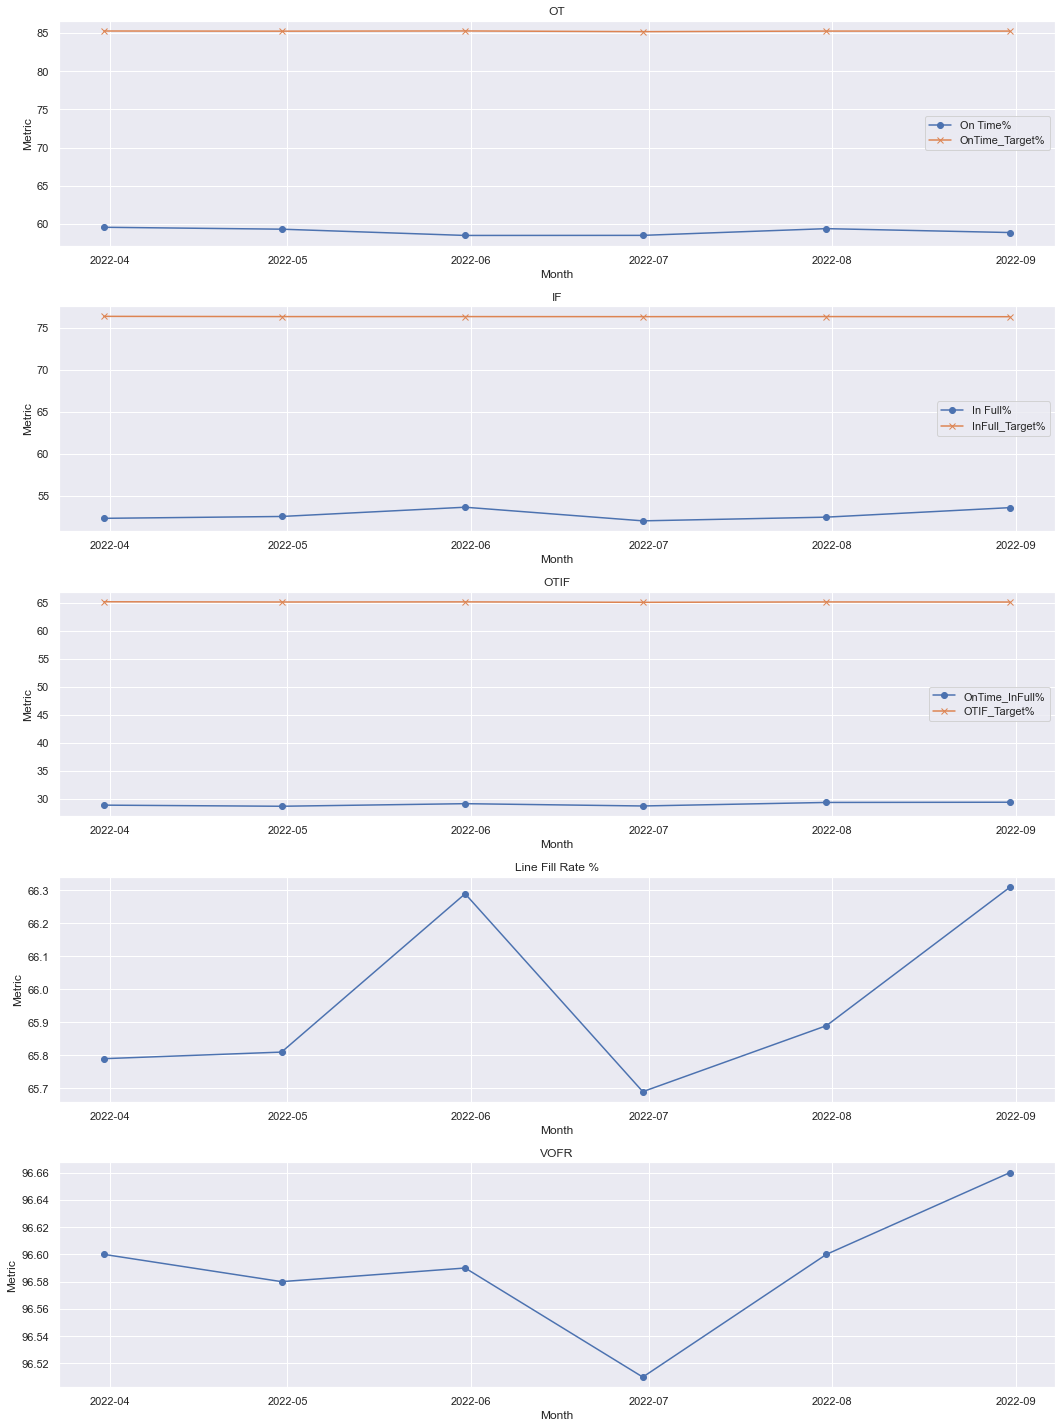

In [70]:
plot_metrics_lines()

### Product Split

- Join dim_product with fact_or_liv on product_id

In [71]:
prod_fact_or_liv = pd.merge(dim_prod, fact_or_lin, how = "left", on = "product_id")
prod_fact_or_liv.head()

,product_name,product_id,category,order_id,order_placement_date,customer_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
0,AM Milk 500,25891101,Dairy,FMR33501401,2022-03-01,789501,484,2022-03-03,2022-03-03,484,1,1,1
1,AM Milk 500,25891101,Dairy,FMR32101601,2022-03-01,789101,474,2022-03-02,2022-03-02,474,1,1,1
2,AM Milk 500,25891101,Dairy,FMR33101403,2022-03-01,789101,349,2022-03-03,2022-03-03,349,1,1,1
3,AM Milk 500,25891101,Dairy,FMR32703401,2022-03-01,789703,492,2022-03-02,2022-03-02,492,1,1,1
4,AM Milk 500,25891101,Dairy,FMR33321602,2022-03-01,789321,345,2022-03-03,2022-03-03,345,1,1,1


In [72]:
# Calculate Line Fill Rate -> LIFR
total_order_lines = prod_fact_or_liv.groupby('product_name')['In Full'].count()
LIFR_col = prod_fact_or_liv.groupby('product_name')['In Full'].sum()
LIFR = round(100*(LIFR_col/total_order_lines),2)
# Calculate Volume Fill Rate -> VOFR
total_qty_ordered = prod_fact_or_liv.groupby('product_name')['order_qty'].sum()
total_qty_delivered = prod_fact_or_liv.groupby('product_name')['delivery_qty'].sum()
VOFR = round(100*(total_qty_delivered/total_qty_ordered),2)
LIFR_VOFR = pd.merge(LIFR.rename('LIFR%'), VOFR.rename('VOFR%'), right_index = True, left_index = True)
LIFR_VOFR.reset_index(inplace = True)
#customer_split = pd.merge(customer_split, LIFR_VOFR, how = "inner", on = "customer_name")

In [73]:
LIFR_VOFR

,product_name,LIFR%,VOFR%
0,AM Biscuits 250,65.16,96.58
1,AM Biscuits 500,66.10,96.49
2,AM Biscuits 750,68.05,96.85
3,AM Butter 100,66.66,96.59
4,AM Butter 250,63.52,96.36
5,AM Butter 500,65.19,96.46
6,AM Curd 100,66.73,96.62
7,AM Curd 250,67.05,96.72
8,AM Curd 50,65.55,96.62
9,AM Ghee 100,65.75,96.59


### Orders Delivered Late

In [74]:
count_late_orders = prod_fact_or_liv[prod_fact_or_liv['actual_delivery_date'] > prod_fact_or_liv['agreed_delivery_date']].shape[0]
print(f"Approximately {round(100*(count_late_orders/prod_fact_or_liv.shape[0]),1)}% orders were delivered late")

Approximately 28.9% orders were delivered late


In [76]:
late_orders = prod_fact_or_liv[prod_fact_or_liv['actual_delivery_date'] > prod_fact_or_liv['agreed_delivery_date']]
late_orders['date_difference']=(late_orders['actual_delivery_date'] - late_orders['agreed_delivery_date']).dt.days
mean_difference = round(late_orders['date_difference'].mean(), 2)
print(f"On an average orders have been {mean_difference} days late from the agreed delivery date")

On an average orders have been 1.69 days late from the agreed delivery date


In [78]:
# Calculate the difference between order placement date and actual delivery date -> like the above cell
# can also check for each category
delivery_time = prod_fact_or_liv.copy()
delivery_time['time_taken'] = (delivery_time['actual_delivery_date'] - delivery_time['order_placement_date']).dt.days
mean_difference = round(delivery_time['time_taken'].mean(), 2)
print(f"On an average it takes {mean_difference} days to ship the product from the day order was placed")

On an average it takes 2.42 days to ship the product from the day order was placed
